<a id='top'></a>

# CSCI 3202, Spring 2020
# Assignment 4
# Due:  Friday March 20, 2020 by 11:59 PM

<br>

### Your name:

<br>


In [34]:
from scipy import stats
from math import floor, isclose
import unittest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

## Problem 1:  (15 points) Green Party President

It's election season, and the chosen president may or may not be the Green Party candidate. Pundits believe that Green Party presidents are more likely to legalize marijuana than candidates from other parties, but legalization could occur under any administration. Armed with the power of probability, the analysts model the situation with the Bayes Net below.

<div>
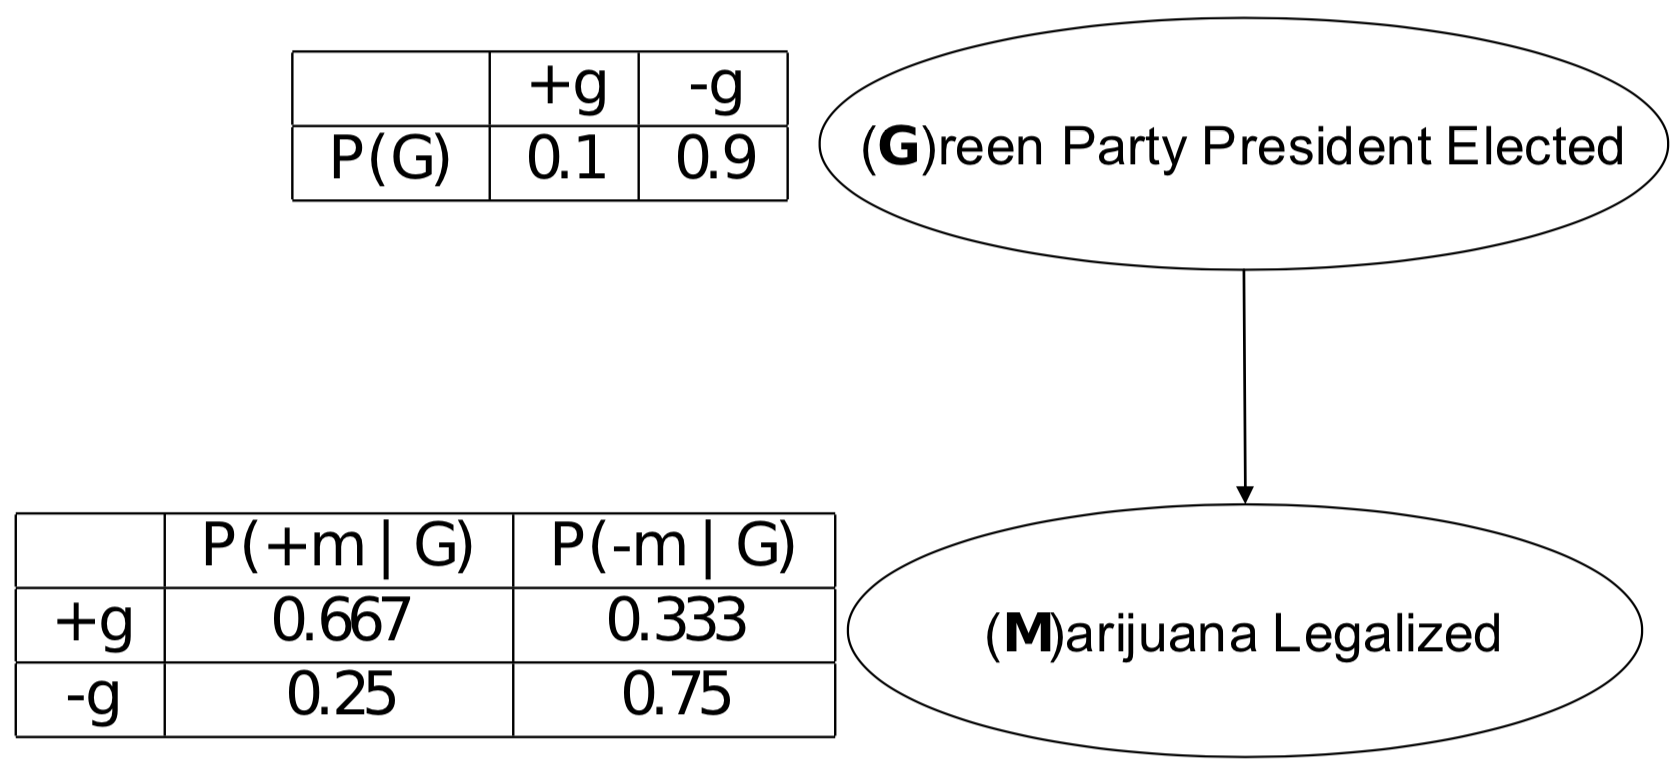
</div>


### (1a)

What is $P(+m)$, the marginal probability that marijuana is legalized?

**Solution:** 
In order to solve for the marginal probability of $P(+m)$ you can use the law of total probability from page 8 of lecture 14 class slides. 

$P(+m) = \sum_{g} P(+m|g)P(g) = P(+m|+g)P(+g) + P(+m|-g)P(-g)$ <br>
$P(+m|+g) = 0.667$ <br>
$P(+g) = 0.1$ <br>
$P(+m|-g) = 0.25$ <br>
$P(-g) = 0.9$ <br>
$P(+m|+g)P(+g) + P(+m|-g)P(-g)  = 0.667*0.1 + 0.25*0.9 = 0.2917$

The marginal probability that marijuana will be legalized is $ P(+m) = 0.2917$.

### (1b)

News agencies air 24/7 coverage of the recent legalization of marijuana (+m), but you can't seem to find out who won the election. What is the conditional probability $P(+g | +m)$ that a Green Party president was elected?

**Solution:** 
To find this probability we must use Bayes rule from page 9 of lecture 14 class slides. <br>
Bayes Rule : $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$ <br>

$P(+g|+m) = \frac{P(+m|+g)P(+g)}{P(+m)}$ <br>
$P(+m|+g) = 0.667$ <br>
$P(+g) = 0.1$ <br>
We claculated in the previous problem that $P(+m) = 0.2917$ <br>
$P(+g|+m) = \frac{P(+m|+g)P(+g)}{P(+m)} = \frac{0.667*0.1}{0.2917} = 0.229$ <br>
Therefore: $P(+g|+m) = 0.229$


### (1c)

Fill in the joint probability table over $G$ and $M$.

| G | M |P(G,M)              |
|---|---|--------------------|
|+g |+m |0.0667                    |
|+g |-m |0.0333                    |
|-g |+m |0.2250                    |
|-g |-m |0.6749                    |

<br>
$P(+g, +m) = P(+g\cap +m) = P(+g|+m)P(+m) = 0.229 * 0.2917 = 0.0667$ <br>

$P(+g|-m) = \frac{P(-m|+g)P(+g)}{P(-m)} = \frac{0.333*0.1}{0.7083} = 0.04701$ <br>
$P(-m) = 0.7083$ <br>
$P(+g, -m) = P(+g\cap -m) = P(+g|-m)P(-m) = 0.04701 * 0.7083 = 0.03330 $ <br>


$P(-g|+m) = \frac{P(+m|-g)P(-g)}{P(+m)} = \frac{0.25*0.9}{0.2917} = 0.7713$  <br>
$P(+m) = 0.2917$ <br>
$P(-g, +m) = P(-g\cap +m) = P(-g|+m)P(+m) = 0.7713 * 0.2917 = 0.2250 $ <br>


$P(-g|-m) = \frac{P(-m|-g)P(-g)}{P(-m)} = \frac{0.75*0.9}{0.7083} = 0.9529$  <br>
$P(-m) = 0.7083$ <br>
$P(-g, -m) = P(-g\cap -m) = P(-g|-m)P(-m) = 0.9529 * 0.7083 = 0.6749 $ <br>


### (1d)

Now suppose we expand the model (Bayes net) by introducing two new random variables: whether the budget is balanced (B), and whether class attendance increases (C). The expanded Bayes net and conditional distributions are shown below.

<div>
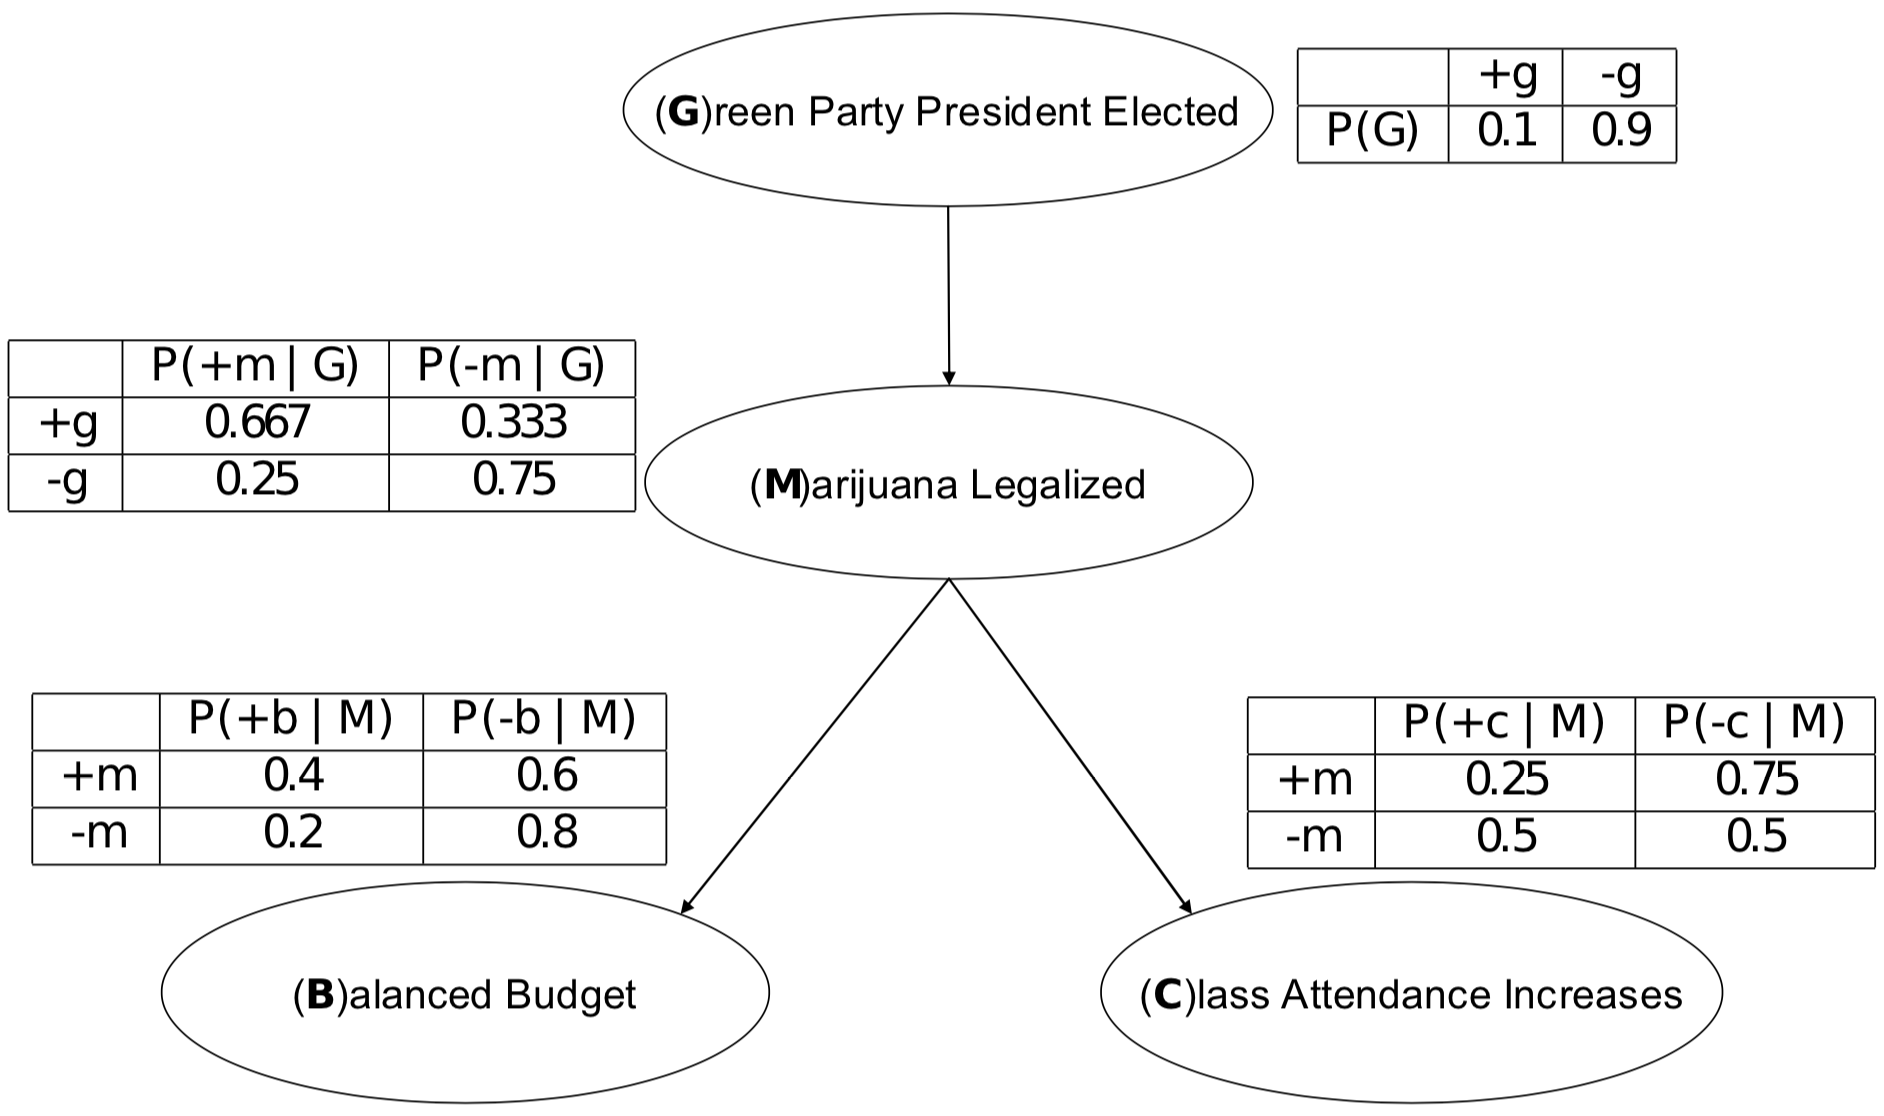
</div>


The full joint distribution is given below. Fill in the missing values.

| G | M | B | C |  P(G, M, B, C) | 
|---|---|---|---|----------------| 
| + | + | + | + |      1/150     | 
| + | + | + | - |      1/50     |
| + | + | - | + |      1/100     |
| + | + | - | - |      3/100     |
| + | - | + | + |      1/300     |
| + | - | + | - |      1/300     |
| + | - | - | + |      1/75     |
| + | - | - | - |      1/75     |
| - | + | + | + |      9/400     | 
| - | + | + | - |     27/400      |
| - | + | - | + |     27/800      |
| - | + | - | - |     81/800      |
| - | - | + | + |      27/400     |
| - | - | + | - |      27/400     |
| - | - | - | + |     27/100      |
| - | - | - | - |     27/100      |


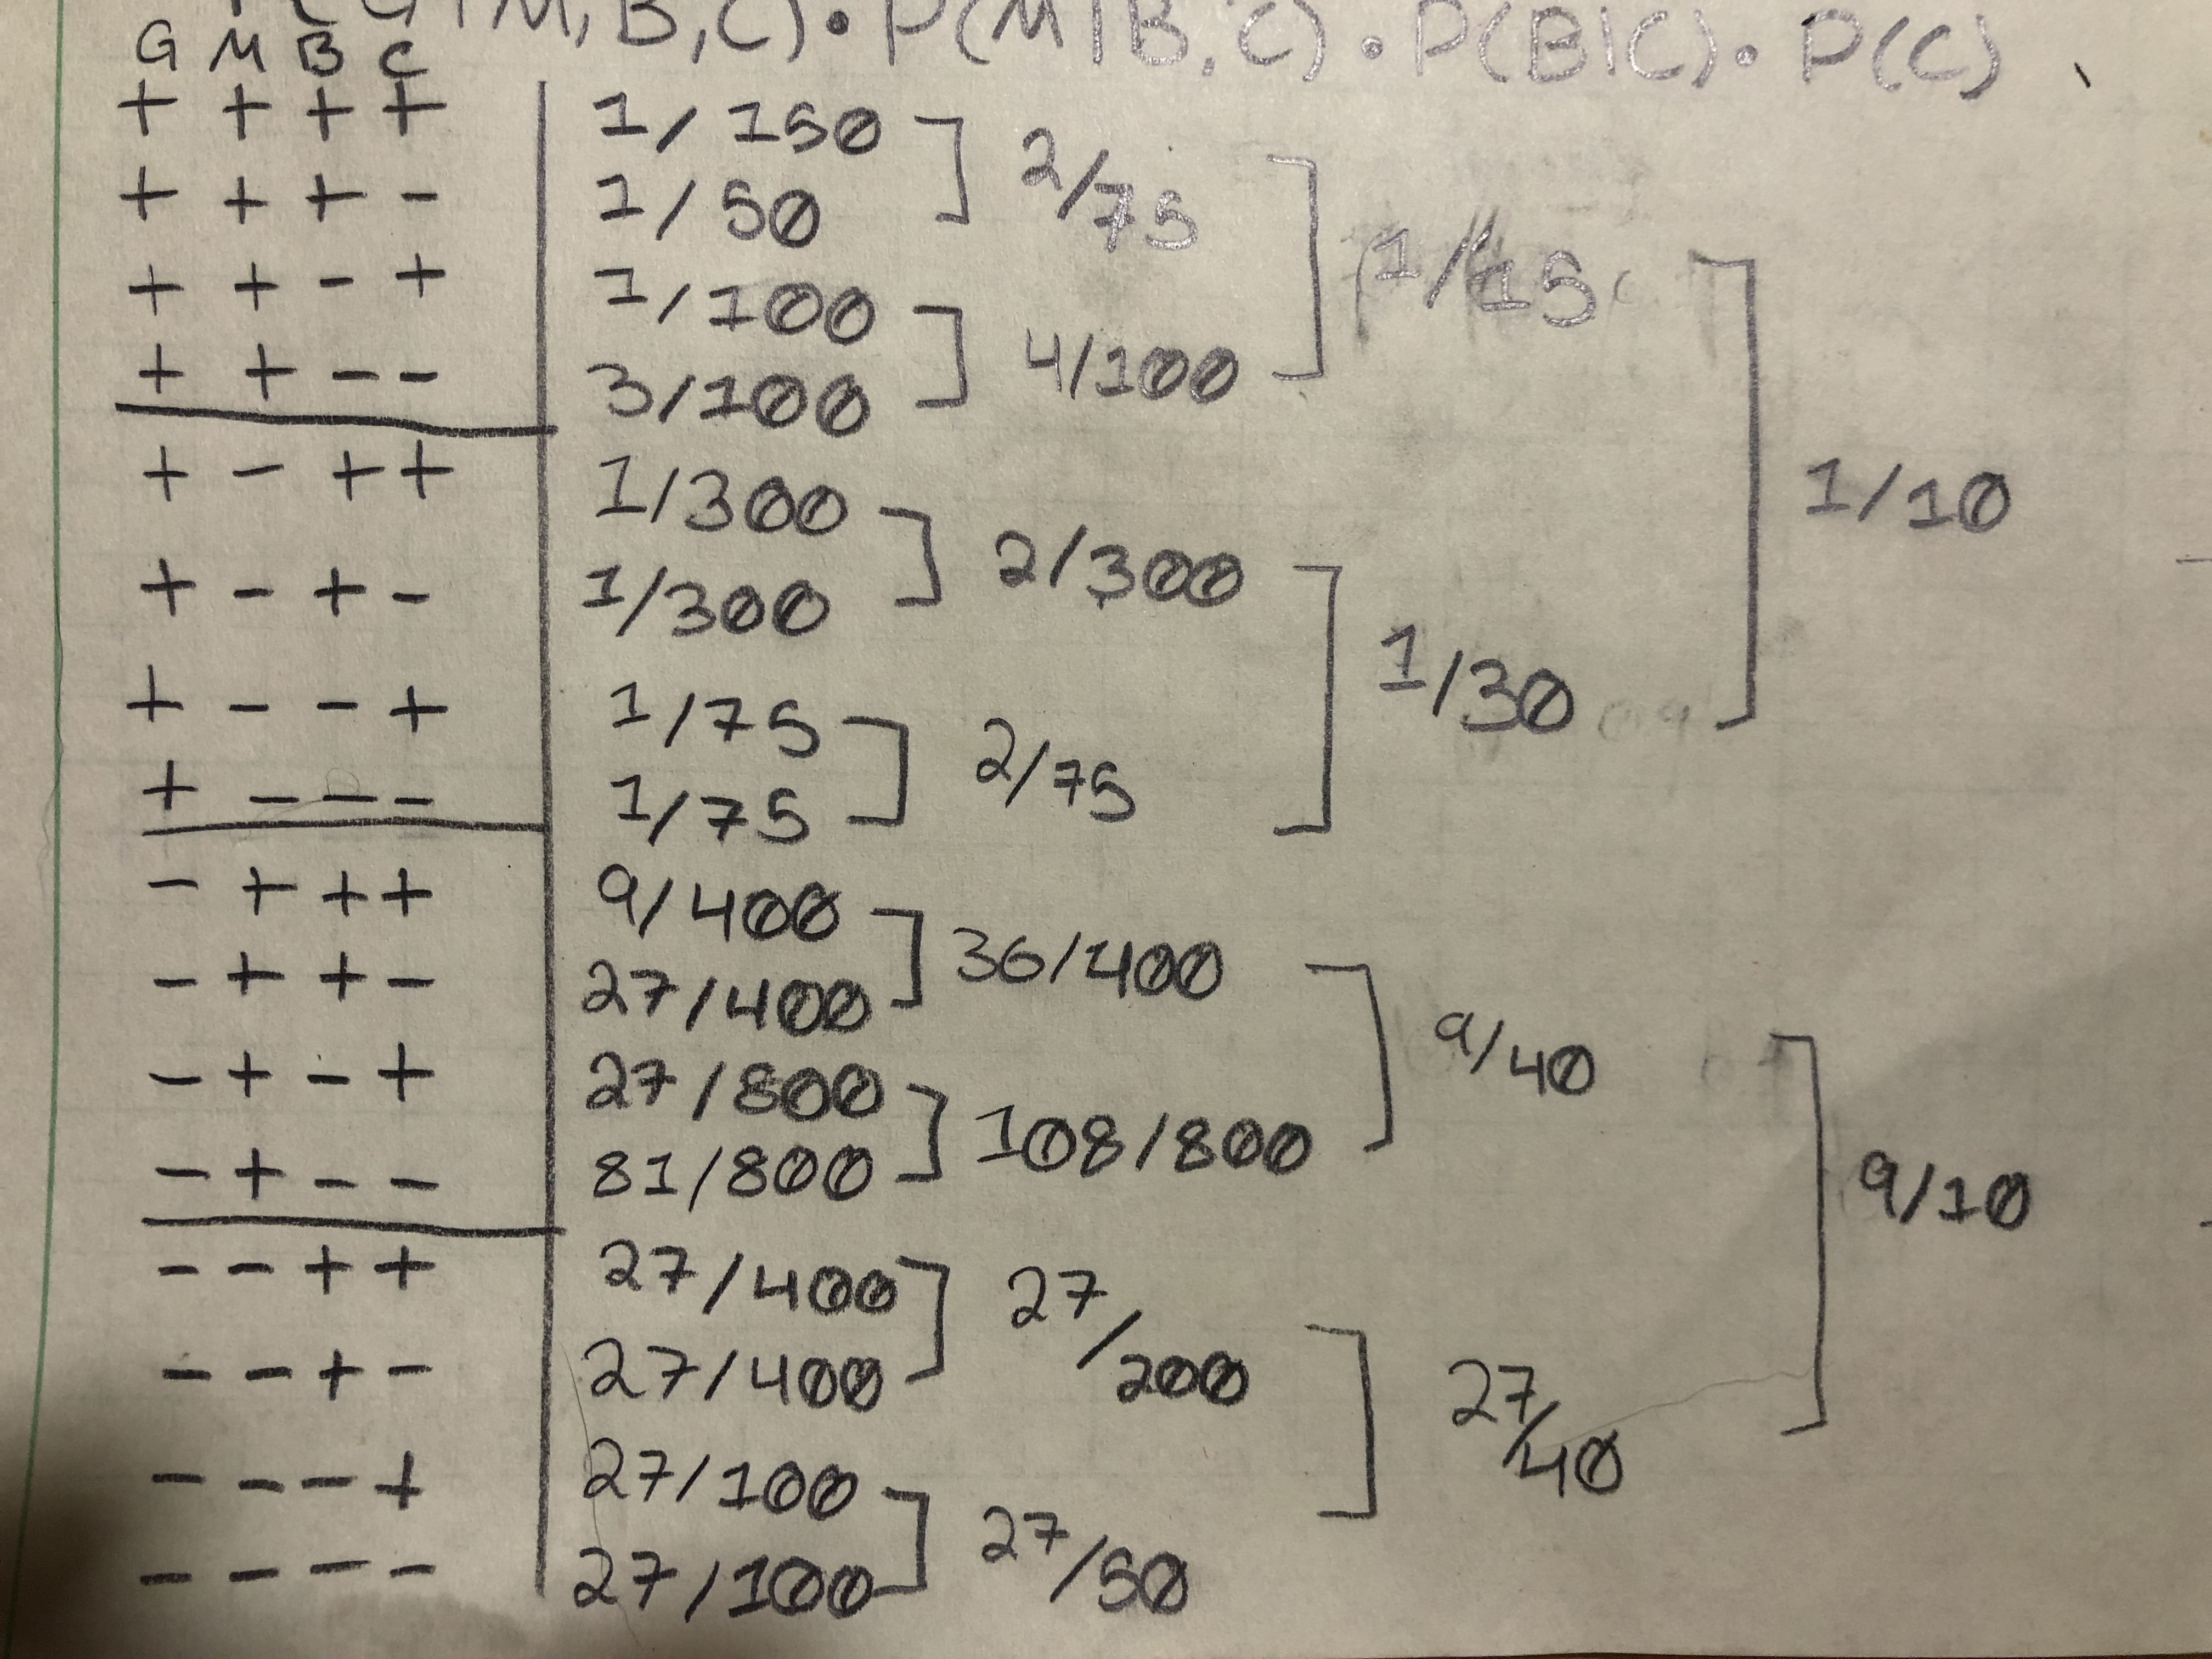

Above is how I solved for the values in the full joint distribution table. I started from the very right of the paper at 1 and filled out each of the corresponding values depending on the probability of the node or variables at that section. For example, we start from one and we know that all positive values have a probability of $0.1$ and negative being $0.9$. You then look at the child nodes of that variable and notice that the probability of positive M's with a positive G is 2/3 so you take 2/3 of 1/10 which is 1/15 and keep going down the list and making sure the entire table is equal and balanced.

---

## Problem 2:  (15 points) Bayesian network to model heart disease

The following Bayesian network is based loosely on a study that examined heart disease risk factors in 167 elderly individuals in South Carolina.  Note that this figure uses Y and N to represent Yes and No, whereas in class we used the equivalent T and F to represent True and False Boolean values.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hw05_bayesnet_heartdisease.png" style="width: 650px;"/>

<a id='p1a'></a>

### (2a) 

Create a `BayesNet` object to model this.  Below are the codes for the (conditional) probability `P` function and `BayesNode` class as well, that we used in class on Monday (9 March) to represent the variable nodes and calculate probabilities. You can code this however you want, subject to the following constraints:
1. the nodes are represented using the `BayesNode` class and can work with the `P` function for probabilities,
1. your `BayesNet` structure keeps track of which nodes are in the Bayes net, as well as
1. which nodes are the parents/children of which other nodes.

Some *suggested* codes for a class structure are given. You are free to use these (the code from our in-class notebooks). The point of this exercise is to make sure you understand the example from class. The suggestions for methods to implement are in view of the fact that we will need to calculate some probabilities, which is going to require us to `find_node`s and `find_values` that nodes can take on.

In [172]:
## For the sake of brevity...
T, F = True, False

## From class:
def P(var, value, evidence={}):
    '''The probability distribution for P(var | evidence), 
    when all parent variables are known (in evidence)'''
    if len(var.parents)==1:
        # only one parent
        row = evidence[var.parents[0]]
    else:
        # multiple parents
        row = tuple(evidence[parent] for parent in var.parents)
    return var.cpt[row] if value else 1-var.cpt[row]

## Also from class:
class BayesNode:
    
    def __init__(self, name, parents, values, cpt):
        if isinstance(parents, str):
            parents = parents.split()
            
        if len(parents)==0:
            # if no parents, empty dict key for cpt
            cpt = {(): cpt}
        elif isinstance(cpt, dict):
            # if there is only one parent, only one tuple argument
            if cpt and isinstance(list(cpt.keys())[0], bool):
                cpt = {(v): p for v, p in cpt.items()}

        self.variable = name
        self.parents = parents
        self.cpt = cpt
        self.values = values
        self.children = []
        
    def __repr__(self):
        return repr((self.variable, ' '.join(self.parents)))    

    
##===============================================##
## Suggested codes for a BayesNet class ##
##===============================================##

class BayesNet:
    '''Bayesian network containing only boolean-variable nodes.'''

    def __init__(self, node_specs=[]):
        '''node_specs is a list of tuples, one per node
        each node has (name, parents, cpt) and nodes must 
        be ordered with parents before children.'''
        self.nodes = []
        self.variables = []
        if node_specs:
            for node_spec in node_specs:
                print(node_spec)
                try:
                    self.add(node_spec)
                except:
                    
                    name, parents, values, cpt = node_spec
                    
                    node = BayesNode(name=name, parents=parents, values=values, cpt=cpt)
                    
                    self.add(node)

    def add(self, node):
        '''Add a new node to the BayesNet, with the given name, parents and
        conditional probability table (cpt). The parents must already be in
        the net, and the variable itself must not be.'''
#         name, parents, values, cpt = node
        
#         node = BayesNode(name=name, parents=parents, values=values, cpt=cpt)
        
        assert node.variable not in self.variables
        assert all((parent in self.variables) for parent in node.parents)
        self.nodes.append(node)
        self.variables.append(node.variable)
        for parent in node.parents:
            self.find_node(parent).children.append(node)

    def find_node(self, var):
        '''Find and return the BayesNode with name `var`'''
        for n in self.nodes:
            if n.variable == var:
                return n
        raise Exception("No such variable: {}".format(var))

    def find_values(self, var):
        '''Return the set of possible values for variable `var`'''
        varnode = self.find_node(var)
        return varnode.values

    def __repr__(self):
        return 'BayesNet({0!r})'.format(self.nodes)

In [173]:
# Create a Bayes net with those nodes and connections

netProblem = BayesNet([
    ('Smoking and Alcohol', '', [T,F], 0.20),
    ('Moderate Exercise', '', [T,F], 0.50),
    ('High BP', ['Smoking and Alcohol', 'Moderate Exercise'], [T,F], {(T, T): 0.60, (T, F): 0.72, (F, T): 0.33, (F, F): 0.51}),
    ('Atherosclerosis', '', [T,F], 0.53),
    ('Family History', '', [T,F], 0.15),
    ('Heart Disease', ['Atherosclerosis', 'High BP', 'Family History'], [T,F], {(T, T, T): 0.92, (T, T, F): 0.91, (T, F, T): 0.81, (T, F, F): 0.77, (F, T, T): 0.75, (F, T, F): 0.69, (F, F, T): 0.38, (F, F, F): 0.23}),
    ('Angina Pectoris', ['Heart Disease'], [T,F], {T: 0.85, F: 0.40}),
    ('Rapid heartbeats', ['Heart Disease'], [T,F], {T: 0.99, F: 0.30})
])


('Smoking and Alcohol', '', [True, False], 0.2)
('Moderate Exercise', '', [True, False], 0.5)
('High BP', ['Smoking and Alcohol', 'Moderate Exercise'], [True, False], {(True, True): 0.6, (True, False): 0.72, (False, True): 0.33, (False, False): 0.51})
('Atherosclerosis', '', [True, False], 0.53)
('Family History', '', [True, False], 0.15)
('Heart Disease', ['Atherosclerosis', 'High BP', 'Family History'], [True, False], {(True, True, True): 0.92, (True, True, False): 0.91, (True, False, True): 0.81, (True, False, False): 0.77, (False, True, True): 0.75, (False, True, False): 0.69, (False, False, True): 0.38, (False, False, False): 0.23})
('Angina Pectoris', ['Heart Disease'], [True, False], {True: 0.85, False: 0.4})
('Rapid heartbeats', ['Heart Disease'], [True, False], {True: 0.99, False: 0.3})


#### Unit tests

In [174]:
class Tests_Problem2(unittest.TestCase):
    def setUp(self):
        self.p1 = BayesNode('p1', '', [T,F], 0.3)
        self.p2 = BayesNode('p2', '', [T,F], 0.6)
        self.c  = BayesNode('c', ['p1', 'p2'], [T,F], {(T,T):0.1, (T,F):0.2, (F,T):0.3, (F,F):0.4})
    def test_onenode(self):
        self.assertEqual(P(self.p1, T), 0.3)
    def test_twonode(self):
        self.assertEqual(P(self.c, F, {'p1':T, 'p2':F}), 0.8)

In [175]:
tests_to_run = unittest.TestSuite()
tests_to_run.addTest(Tests_Problem2("test_onenode"))
tests_to_run.addTest(Tests_Problem2("test_twonode"))
unittest.TextTestRunner().run(tests_to_run)

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>



### (2b)

Craft a function `get_prob(X, e, bn)` to return the **normalized** probability distribution of variable `X` in Bayes net `bn`, given the evidence `e`.  That is, return $P(X \mid e)$. The arguments are:
* `X` is some representation of the variable you are querying the probability distribution of. Either a string (the variable name from the `BayesNode` or a `BayesNode` object itself are good options.
* `e` is some representation of the evidence your probability is conditioned on. When given an empty argument (or `None`) for `e`, `get_prob` should return the marginal distribution $P(X)$.
* `bn` is your `BayesNet` object.

You may do this using the `enumeration` algorithm from class (pseudocode is in the book), or by brute force (i.e., use a few `for` loops). Either way, you should be using your `BayesNet` object to keep track of all the nodes and relationships between nodes so your `get_prob` function knows these things.

In [176]:
# Solution:

class PDF_discrete:
    '''Define a discrete probability distribution function.'''

    def __init__(self, varname='?', freqs=None):
        '''Create a dictionary of values - frequency pairs,
        then normalize the distribution to sum to 1.'''
        self.prob = {}
        self.varname = varname
        self.values = []
        if freqs:
            for (v, p) in freqs.items():
                self[v] = p
        self.normalize()

    def __getitem__(self, value):
        '''Given a value, return P[value]'''
        try:
            return self.prob[value]
        except KeyError:
            return 0

    def __setitem__(self, value, p):
        '''Set P[value] = p, input argument if '''
        if value not in self.values:
            self.values.append(value)
        self.prob[value] = p

    def normalize(self):
        '''Normalize the probability distribution and return it.
        If the sum of PDF values is 0, then return a 0'''
        total = sum(self.prob.values())
        if not isclose(total, 1.0):
            for value in self.prob:
                self.prob[value] /= total
        return self
    
def extend(s, var, val):
    """Copy the substitution s and extend it by setting var to val; return copy."""
    s2 = s.copy()
    s2[var] = val
    return s2

def get_prob(X, e, bn):
    '''Return the conditional probability distribution of variable X
    given evidence e, from BayesNet bn. [Figure 14.9]'''
    Q = PDF_discrete(X)
    print("X",X)
    print("e",e)
    for xi in bn.find_values(X):
        Q[xi] = enumerate_all(bn.variables, extend(e, X, xi), bn)
        print(Q.prob)
        #print(Q.normalize())
    return Q.normalize()


def enumerate_all(variables, e, bn):
    '''Return the sum of those entries in P(variables | e{others})
    consistent with e, where P is the joint distribution represented
    by bn, and e{others} means e restricted to bn's other variables
    (the ones other than variables). Parents must precede children in variables.'''
    if not variables:
        return 1.0
    Y, rest = variables[0], variables[1:]
    Ynode = bn.find_node(Y)
    if Y in e:
        # Y in evidence, so we know its value and just multiply
        return P(Ynode, e[Y], e) * enumerate_all(rest, e, bn)
    else:
        # Y not in evidence so we have to sum (Law of Total Prob.)    
        return sum(P(Ynode, y, e) * enumerate_all(rest, extend(e, Y, y), bn)
                   for y in bn.find_values(Y))

Use your `get_prob` function to calculate the following probabilities. Print them to the screen and compare to the original Bayes net figure given to make sure the output passes these "unit tests".

1. The marginal probability of `Family History` is $P(FH=T)=0.15$
2. The probability of *not* experiencing `Angina Pectoris`, given `Heart Disease` is observed, is $P(Ang=F \mid HD=T)=1-0.85=0.15$
3. The probability of `High Blood Pressure`, given a person does `Smoke and/or use Alcohol` but does not get `Moderate Exercise`, is $P(HBP=T \mid Sm=T, ME=F)=0.72$

In [177]:
# Your code here.
p1 = get_prob(X='Family History', e={}, bn=netProblem)
p1.prob

X Family History
e {}
{True: 0.15}
{True: 0.15, False: 0.85}


{True: 0.15, False: 0.85}

The above code for test case 1 works perfectly.

In [196]:
p2 = get_prob(X='Angina Pectoris', e={'Heart Disease' : T}, bn=netProblem).prob
print('IGNORE THE ABOVE VALUE, THE REAL VALUE IS: ', p2[False])

X Angina Pectoris
e {'Heart Disease': True}
{True: 0.5625100759999999}
{True: 0.5625100759999999, False: 0.09926648400000002}
IGNORE THE ABOVE VALUE, THE REAL VALUE IS:  0.15000000000000002


The above calculation for part 2 was correct.

In [195]:
p3 = get_prob(X='High BP', e={'Smoking and Alcohol' : T, 'Moderate Exercise' : F}, bn=netProblem)
print('IGNORE THE ABOVE VALUE, THE REAL VALUE IS: ', p3[True])

X High BP
e {'Smoking and Alcohol': True, 'Moderate Exercise': False}
{True: 0.072}
{True: 0.072, False: 0.028000000000000004}
IGNORE THE ABOVE VALUE, THE REAL VALUE IS:  0.7199999999999999


The above calculation for part 3 was correct.



### (2c)

Calculate the probability of observing someone with `High Blood Pressure`, $P(HBP=T)$, *by hand*, showing all work in Markdown/LateX below.

**Solution:**

P(HBP=T) = P(+HBP|+SM,-ME)

If we look on the HPB table you can see where +SM and -ME are and see that P(HBP=T) = 0.72

**Verify** your calculation using your `get_prob` function.

In [194]:
# Your code here.
p4 = get_prob(X='High BP', e={'Smoking and Alcohol':T, 'Moderate Exercise':F}, bn = netProblem)
print('IGNORE THE ABOVE VALUE, THE REAL VALUE IS: ', p4[True])

X High BP
e {'Smoking and Alcohol': True, 'Moderate Exercise': False}
{True: 0.072}
{True: 0.072, False: 0.028000000000000004}
IGNORE THE ABOVE VALUE, THE REAL VALUE IS:  0.7199999999999999




### (2d)

Now calculate the following probabilities using your `get_prob` function.

[i] The probability of an arbitrary individual having `Heart Disease`, $P(HD=T)$

In [193]:
# Your code here.
p5 = get_prob(X='Heart Disease', e={}, bn = netProblem)
print('IGNORE THE ABOVE VALUE, THE REAL VALUE IS: ', p5[True])

X Heart Disease
e {}
{True: 0.6617765600000001}
{True: 0.6617765600000001, False: 0.33822343999999993}
IGNORE THE ABOVE VALUE, THE REAL VALUE IS:  0.6617765600000001


[ii] The probability that an individual does *not* have `Heart Disease`, given that `Rapid Heartbeat` was observed, $P(HD=F \mid Rapid=T)$

In [192]:
# Your code here.
p6 = get_prob(X='Heart Disease', e={'Rapid heartbeats' : T}, bn = netProblem)
print('IGNORE THE ABOVE VALUE, THE REAL VALUE IS: ', p6[True])

X Heart Disease
e {'Rapid heartbeats': True}
{True: 0.6551587944000001}
{True: 0.6551587944000001, False: 0.101467032}
IGNORE THE ABOVE VALUE, THE REAL VALUE IS:  0.865895362727999


[iii] The probability of an individual having `High Blood Pressure` if they have `Heart Disease` and a `Family History`, $P(HBP=T \mid HD=T, FH=T)$

In [189]:
# Your code here.
p7 = get_prob(X='High BP', e={'Heart Disease' : T, 'Family History' : T}, bn = netProblem)
print('IGNORE THE ABOVE VALUE, THE REAL VALUE IS: ', p7[True])

X High BP
e {'Heart Disease': True, 'Family History': True}
{True: 0.058975019999999996}
{True: 0.058975019999999996, False: 0.04851042}
IGNORE THE ABOVE VALUE, THE REAL VALUE IS:  0.5486791513343575


[iv] The probability that an individual is a `Smoker/Alcohol User` if they have `Heart Disease`, $P(Sm=T \mid HD=T)$

In [188]:
# Your code here.
p8 = get_prob(X='Smoking and Alcohol', e={'Heart Disease' : T}, bn = netProblem)
print('IGNORE THE ABOVE VALUE, THE REAL VALUE IS: ', p8.prob[True])

X Smoking and Alcohol
e {'Heart Disease': True}
{True: 0.14317144}
{True: 0.14317144, False: 0.51860512}
IGNORE THE ABOVE VALUE, THE REAL VALUE IS:  0.2163440784303391


[v] How would you expect the probability in [iv] to change if you also know the individual has `High Blood Pressure`?  Verify your hypothesis by calculating the relevant probability.

**Solution:** The probability would inceease. We know this because Smoking/Alcohol is a cause or parent of High Blood Pressure so that we can infer that if someone has High BP that they would be a smoker.

In [187]:
# Your code here.
p9 = get_prob(X='Smoking and Alcohol', e={'Heart Disease' : T, 'High BP' : T}, bn = netProblem)
print('IGNORE THE ABOVE VALUE, THE REAL VALUE IS: ', p9[True])

X Smoking and Alcohol
e {'Heart Disease': True, 'High BP': True}
{True: 0.10713450000000001}
{True: 0.10713450000000001, False: 0.272706}
IGNORE THE ABOVE VALUE, THE REAL VALUE IS:  0.28205128205128205


---


<img src="https://inhabitat.com/wp-content/blogs.dir/1/files/2014/02/norman-bike-riding-dog.png" style="width: 350px;"/>

## Problem 3:  (20 points) Bayesian network to model decision-making

Let's consider using a Bayesian network to model our decision about whether or not to ride our bike to work today.  This decision depends heavily on the weather, so let's focus on that.

In class, we focused on Boolean variables.  For example, we might base our biking decision on whether or not it is raining.  But in reality, it probably matters *how hard* it is raining.  So suppose we break the variable `Rain` up into three discrete bins: `none`, `light` and `heavy`.

The temperature also factors into our decision.  There is definitely a sweet spot, where temperatures are neither too warm nor too cold, so it is very likely we would enjoy riding our bike.  So we can model the variable `Temperature` also using three discrete bins: `cold`, `moderate` and `warm`.

So a Bayesian network to model our decision for whether or not to bike to work could be as follows, where the first letter of each discrete bin is used to denote that variable value (i.e., `R=h` stands for heavy rain conditions).

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/bayesnet_biking2.png" style="width: 650px;"/>


### (3a)

Modify the `P` probability function to be able to handle these ternary parent nodes.

In [152]:
# modified function for conditional probabilities,
# to handle ternary (or more) case
def P(var, value, evidence={}):
    '''The probability distribution for P(var | evidence), 
    when all parent variables are known (in evidence)'''
    print(var)
    
    

    
    if len(var.parents)==1:
        # only one parent
        row = evidence[var.parents[0]]
        
    else:
        # multiple parents
        row = tuple(evidence[parent] for parent in var.parents)
        
    if len(var.parents)==0:
        return var.cpt[row][value] if value in var.cpt[row].keys() else 1-sum(var.cpt[row].values())
        
        
    return var.cpt[row] if value else 1-var.cpt[row]

Set up `BayesNode` objects for each of `Rain`, `Temp` and `Bike`, and create a `BayesNet` object to model the Bayesian network for this decision.  Again, you can use whatever structure you wish for your `BayesNet`, but please use the `BayesNode` class.  You may need to make minor modifications to the `BayesNode` class (e.g., changing/adding attributes), although none are strictly necessary.

In [153]:
# Set up the Bayes net
class BayesNode:
    
    def __init__(self, name, parents, values, cpt):
        if isinstance(parents, str):
            parents = parents.split()
            
        if len(parents)==0:
            # if no parents, empty dict key for cpt
            cpt = {(): cpt}
        elif isinstance(cpt, dict):
            # if there is only one parent, only one tuple argument
            if cpt and isinstance(list(cpt.keys())[0], bool):
                cpt = {(v): p for v, p in cpt.items()}

        self.variable = name
        self.parents = parents
        self.cpt = cpt
        self.values = values
        self.children = []
        
    def __repr__(self):
        return repr((self.variable, ' '.join(self.parents)))

**Verify** that your modified probability function `P` is working by checking the following "unit tests". Print the output to screen and compare to what you expect from the figure above.

1. The marginal probability of no rain is $P(Rain=n)=0.8$
1. The marginal probability of light rain is $P(Rain=l)=0.15$
1. The marginal probability of heavy rain is $P(Rain=h)=0.05$
1. The probability of biking given that it is raining heavily and the temperature is cold, is $P(Bike=T \mid Rain=h, Temp=c)=0.2$

In [154]:
# Your code here.
# self.c  = BayesNode('c', ['p1', 'p2'], [T,F], {(T,T):0.1, (T,F):0.2, (F,T):0.3, (F,F):0.4})

# RainBayesNode = BayesNode('Rain', '', ['n', 'l', 'h'], {('n'): 0.8, ('l'): 0.15, ('h'): 0.05})

n,l,h,c,m,w,T,F = 'None','Light','Heavy','Cold','Moderate','Warm',True,False

RainBayesNode = BayesNode('Rain', '', [n,l,h], {n : 0.8, l : 0.15})

print("No rain =",P(RainBayesNode, n, {}))
print("Light rain =",P(RainBayesNode, l, {}))
print("Heavy rain =",P(RainBayesNode, h, {}))

('Rain', '')
No rain = 0.8
('Rain', '')
Light rain = 0.15
('Rain', '')
Heavy rain = 0.04999999999999993


### (3b)

(i) Use `get_prob` to calculate $P(Bike)$, the probability distribution for whether or not you will ride your bike on any given day.

In [155]:
def get_prob(X, e, bn):
    '''Return the conditional probability distribution of variable X
    given evidence e, from BayesNet bn. [Figure 14.9]'''
    Q = PDF_discrete(X)
    print("X",X)
    print("e",e)
    for xi in bn.find_values(X):
        Q[xi] = enumerate_all(bn.variables, extend(e, X, xi), bn)
        print(Q.prob)
        #print(Q.normalize())
    return Q.normalize()

In [167]:
# Your code here.


TempBayesNode = BayesNode('Temp', '', [c,m,w], {c : 0.3, m : 0.6 })
BikeBayesNode = BayesNode('Bike', ['Rain','Temp'],[T, F], {
        (n,c):0.7,
        (n,m):0.99,
        (n,w):0.9,
        (l,c):0.4,
        (l,m):0.6,
        (l,w):0.5,
        (h,c):0.2,
        (h,m):0.4,
        (h,w):0.3
    })


BikeBayesNet = BayesNet([RainBayesNode, TempBayesNode, BikeBayesNode])

# BikeBayesNet = BayesNet()

# P(BikeBayesNode, 'T', {})

print('P(R=n)={}'.format(P(RainBayesNode, n, {})))

print('P(B=T | R=h, T=c)={}'.format(P(BikeBayesNode, T, {'Rain' : h, 'Temp' : c})))

get_prob(X='Bike', e={}, bn = BikeBayesNet)[True]

('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Rain', '')
P(R=n)=0.8
('Bike', 'Rain Temp')
P(B=T | R=h, T=c)=0.2
X Bike
e {}
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
{True: 0.8112}
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
{True: 0.8112, False: 0.18880000000000002}


0.8112

Probability that you will bike given any day is 81.12%

(ii) Use `get_prob` to calculate the probability that you will ride your bike, given that it is lightly raining.

In [166]:
# Your code here.
get_prob(X='Bike', e={'Rain':l}, bn = BikeBayesNet)[True]

X Bike
e {'Rain': 'Light'}
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
{True: 0.0795}
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
('Temp', '')
('Bike', 'Rain Temp')
{True: 0.0795, False: 0.07050000000000001}


0.5299999999999999

Probability that you will bike given that it is lightly raining is 0.5299%


### (3c)

We are trapped indoors because some jerk gave us a ton of Intro to Artificial Intelligence homework to do.  Suppose we look out the window and see people biking. They sure do look like they're having fun! *Given* this information, we can actually make inferences regarding the temperature outside!  What is the probability distribution for temperature, given that we observe people biking?

First, compute this using your `get_prob` function.

In [165]:
# Your code here.
q3c = get_prob(X='Temp', e={'Bike': T}, bn = BikeBayesNet)
print(q3c[c])
print(q3c[m])
print(q3c[w])

X Temp
e {'Bike': True}
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
{'Cold': 0.189}
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
{'Cold': 0.189, 'Moderate': 0.5412}
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
('Rain', '')
('Temp', '')
('Bike', 'Rain Temp')
{'Cold': 0.189, 'Moderate': 0.5412, 'Warm': 0.08100000000000007}
0.23298816568047337
0.6671597633136095
0.09985207100591724


From this information and that you can see people outside biking, you can infer that the probability of it being cold is 0.233, moderate is 0.667, and warm is 0.099.



### (3d)

Confirm your answer to **3c** by hand, showing *all* relevant work below in a LateX/Markdown cell.

**Solution:**

$P(Temp|+B) = \frac{P(T,+B)}{P(+B)}$

We know that $P(+B) = 0.8112$

Different kinds of temps are cold, moderate, and warm.

First, let's find the probability of it being cold given that there are people outside.

$P(T=c|+B) = \frac{P(+B|T=c)P(T=c)}{P(+B)} = \frac{((0.7*0.8)+(0.4*0.15)+(0.2*0.05))*0.3}{0.8112}=0.233$

Now, let's find the probability of it being moderate given that there are people outside.

$P(T=m|+B) = \frac{P(+B|T=m)P(T=m)}{P(+B)} = \frac{((0.99*0.8)+(0.6*0.15)+(0.4*0.05))*0.6}{0.8112}=0.667$

Finally, let's find the probability of it being warm given that there are people outside.

$P(T=w|+B) = \frac{P(+B|T=w)P(T=w)}{P(+B)} = \frac{((0.9*0.8)+(0.5*0.15)+(0.3*0.05))*0.1}{0.8112}=0.099$